In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import openpyxl
from jupyter_dash import JupyterDash
from dash import dcc, html
from dash import html

pd.set_option('display.max_rows', None)

from dash.dependencies import Output, Input
from dash.exceptions import PreventUpdate

In [49]:
file_path = "Zazi iZandi EGRA.xlsx"
sheet_name = "Sheet2"
all_children = pd.read_excel(file_path, sheet_name=sheet_name)

In [50]:
children = all_children[all_children['Province'] == 'Eastern Cape']

In [76]:
def process_string(x):
    try:
        return list(map(int, x.split()))
    except:
        return []

children.loc[:, "letter_nums_correct_list"] = children["letter_1_metadata_9"].apply(process_string)


In [101]:
#create the egra dictionary
egra_letters = ["l", "a", "m", "E", "S", "n", "L", "s", "M", "e", "Y", "i", "K", "N", "d", "H", "f", "U", "h", "v", "F", "y", "C", "I", "T", "k", "D", "Z", "f", "d", "t", "z", "O", "J", "P", "r", "c", "W", "p", "o", "w", "A", "E", "x", "Q", "I", "g", "O", "U", "z", "X", "r", "V", "B", "j", "b", "q", "u", "R", "G"]

egra_dict = {}
for index,letter in enumerate(egra_letters):
    egra_dict[index+1] = letter

#convert numbers in column to correpsonding letter from the egra
children.loc[:,"letters_correct_list"] = children["letter_nums_correct_list"].apply(lambda x: [egra_dict[num] for num in x])

#lowercase all and remove duplicates
children.loc[:,'letters_cleaned'] = children['letters_correct_list'].apply(lambda x: list(set([letter.lower() for letter in x])))

children.loc[:,'unique_letters_correct'] = children['letters_cleaned'].apply(len)
children[['unique_letters_correct', 'letters_cleaned']]

,unique_letters_correct,letters_cleaned
0,26,"[v, r, i, w, q, l, z, p, e, a, k, y, o, g, n, ..."
2,24,"[v, r, i, w, q, l, z, p, e, a, k, y, o, n, t, ..."
3,23,"[v, r, i, w, q, l, z, p, e, a, k, y, o, n, t, ..."
4,26,"[v, r, i, w, q, l, z, p, e, a, k, y, o, g, n, ..."
6,11,"[y, n, e, a, s, i, k, h, m, d, l]"
7,24,"[v, r, i, w, l, z, p, e, a, k, y, o, g, n, t, ..."
9,19,"[v, r, i, w, l, z, p, e, a, k, o, n, t, h, f, ..."
10,26,"[v, r, i, w, q, l, z, p, e, a, k, y, o, g, n, ..."
11,12,"[n, t, v, e, u, s, l, i, k, m, d, y]"
12,0,[]


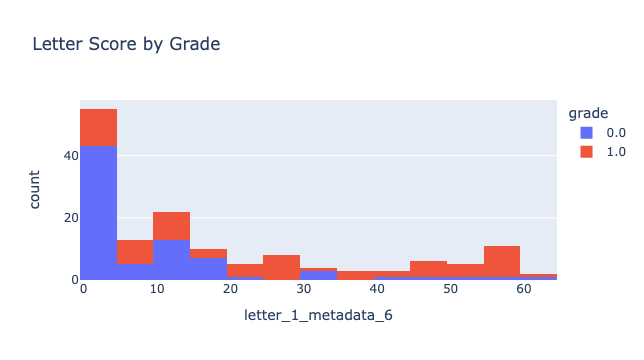

In [37]:
fig = px.histogram(children, x="letter_1_metadata_6
                   ", color="grade", title="Letter Score by Grade")
fig.show()


In [31]:
school = children.groupby('school')
grade = children.groupby(['grade', 'school'])

In [41]:
grade = children.groupby(['grade', 'school'])
agg_results = grade['letter_1_metadata_6'].agg(['mean', 'median'])
agg_results.round()


mean  median
grade school                              
0.0   Emafini Primary          5.0     0.0
      Gertrude Shope Primary   6.0     0.0
      Mzimhlophe Primary      10.0     2.0
      Ntyatyambo Primary      18.0    13.0
      Spencer Mabija Primary   4.0     2.0
1.0   Emafini Primary         25.0    16.0
      Gertrude Shope Primary  22.0    17.0
      Mzimhlophe Primary      18.0    16.0
      Ntyatyambo Primary      37.0    47.0
      Spencer Mabija Primary  33.0    26.0

In [92]:
children["letters_correct_list"]

0      [l, a, m, E, S, n, L, s, M, e, Y, i, K, N, d, ...
2      [l, a, m, E, S, n, L, s, M, e, Y, i, K, N, d, ...
3      [l, a, m, E, S, n, L, s, M, e, Y, i, N, d, f, ...
4      [l, a, m, E, n, L, s, M, e, i, K, N, d, H, f, ...
6       [l, a, m, E, S, n, L, s, M, e, Y, i, K, N, d, H]
7      [l, a, m, E, S, n, L, s, M, e, Y, i, K, N, d, ...
9      [l, a, m, E, S, n, L, s, M, e, i, K, N, d, H, ...
10     [l, a, m, E, S, n, L, s, M, e, Y, i, K, N, d, ...
11     [l, m, E, S, L, s, M, e, Y, i, K, N, d, U, v, ...
12                                                    []
13                                 [a, m, S, L, s, M, e]
15                                                    []
18                                                    []
23                                                    []
25                                                    []
27                                                    []
29                                                    []
30                             